## Instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Please see the [module book](https://moody.st-andrews.ac.uk/moodle/mod/resource/view.php?id=950238) for full instructions on completing your tutorial work.

Make sure you *only* fill in places that say `YOUR CODE HERE` or "YOUR ANSWER HERE". Replace the contents of those cells only, changing other cells may prevent grading.

When using matplotlib please make sure to use the inline option (not notebook) to allow grading: 
`%matplotlib inline`



---

<font size="4" >

    
# Tutorial 7: Graph Colouring

For a positive integer $k$, a *k-colouring* of a graph $G = (V, E)$ is a function $f: V \to \{1, 2, \ldots, k \}$ such that if $\{u, v\} \in E$ is any edge of $G$, then $f(u) \neq f(v)$. In other words, it is an assignment of the "colours" $1$ up to $k$ to the vertices of $G$ such that no neighbouring vertices share a colour. The smallest $k$ for which this is possible, i.e. the smallest number of colours required, is called the *chromatic number* of $G$. 

Finding the chromatic number of a graph is an $NP$-hard problem, and determining whether the chromatic number is equal to $k$ (for some $k > 2$) is $NP$-complete; both of these are with relation to the number of vertices or edges.

A *colouring* of a graph is a $k$-colouring, for some $k \geq 1$.
    
Colouring graphs has applications in scheduling and in compilers, among many other things. You typically want to use as few colours as possible in these applications, as the colours represent resources.
    
The most famous appearance of graph colouring is in the Four-Colour Theorem, which states that any graph which can be drawn in the plane without overlapping edges requires at most $4$ colours; the known proofs of this are all computer-based.

<font size="4" >


## Q1

A simple method to find a colouring of a graph, with vertices $\{0, 1, \ldots, n - 1\}$, is the following *greedy* algorithm:

1. For $v$ in `0, 1, 2, ..., n - 1`:
    1. Find the smallest colour (positive integer) $m$ which is not a colour of any neighbour of $v$.
    2. Assign $m$ as the colour of $v$.
    
Implement the method above as a function `greedy_colouring` which takes a networkx `Graph` `G` (with vertices $\{0, 1, \ldots, n - 1\}$) and returns a `list` `C` of the colours of `G`, where `C[i]` is the colour of vertex $i$.
    
<p style='text-align:right;'> <b> [3 Marks] </b> </p>

As a test, the Hoffman-Singleton graph (`nx.hoffman_singleton_graph()`) should require 6 colours using this method.
If you have a graph `G`, you can draw it with coloured vertices using the code below: 
 
```python
ten_colours = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
               '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD']
nx.draw_networkx(G, 
                 node_color=[ten_colours[i - 1] for i in greedy_colouring(G)],
                 with_labels=False)
```
These ten colours are [Paul Tol's](https://personal.sron.nl/~pault/) muted colour scheme, designed with colour-blindness in mind; if you want to draw examples of graphs with more than ten colours you will have to extend the list. Vertex labels are omitted here.

Two marks are available for a correct solution, and one for general code quality.

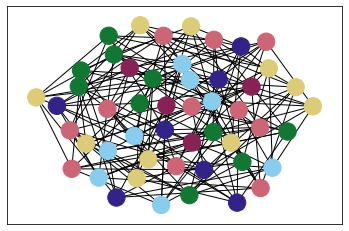

In [1]:
# your code goes here
import networkx as nx
import matplotlib.pyplot as plt


def greedy_colouring(G, use_heuristic=False):
    # dictionary to store the colours
    colours = {}
    # heuristic sorting for Part 3
    if use_heuristic:
        vertices = sorted(G.nodes(), key=G.degree, reverse=True)
    else:
        vertices = G.nodes()
    for v in vertices:
        # find the neighbours colours
        neighbour_colours = set(colours.get(n, None) for n in G.neighbors(v))
        # smallest integer that is not in neighbour_colours
        m = 1
        while m in neighbour_colours:
            m += 1
        colours[v] = m
    # dictionary of colours to a list
    C = [colours[i] for i in range(len(G))]

    return C

G = nx.hoffman_singleton_graph()
ten_colours = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
               '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD']
nx.draw_networkx(G, 
                 node_color=[ten_colours[i - 1] for i in greedy_colouring(G)],
                 with_labels=False)

In [2]:
if not "greedy_colouring" in globals():
    raise NotImplementedError("greedy_colouring has not been defined")


<font size="4" >


## Q2
    
Both of the following arguments are **incorrect**. Explain why; please be clear and brief!

**(a)** In the introduction, it was claimed that finding the chromatic number of a graph is $NP$-complete. However, the greedy colouring algorithm works in polynomial time and the chromatic number is the maximum colour used by it, which can be found in linear time. Hence $P = NP$.

**(b)** Here is an algorithm for testing whether the chromatic number is $3$:
    
```
1. For each function f: V -> {1, 2, 3}, test if it defines a colouring.
2. If there was any such f which did define a colouring using three colours,
   but there was none using only one or two colours, then return True
3. Otherwise return False
```
    
There are $3^{|V|}$ such functions $f$, so the number of steps taken by this algorithm grows faster than any polynomial. This means that the decision problem "is the chromatic number of $G$ equal to 3?" is not in $P$. In the introduction we said that this problem is $NP$-complete, so it certainly is in $NP$. Hence $P \neq NP$.

<p style='text-align:right;'> <b> [2 Marks] </b> </p>

    
Details:
1. You do not need to "nitpick" the arguments; just provide the most critical flaw that each has. Each has a step that is *wrong*, not just insufficiently-justified.
2. You must answer in the cell which says `YOUR ANSWER HERE`; *do not delete this cell*.

YOUR ANSWER HERE
<br> (a) The greedy colouring algorithm do not always find the minimum number of colour and the number it finds depend on the order of the vertices
<br> (b) The algorithm can be turned into check “For each edge {u, v} in graph G verify that the colour c(u) != c(v)” which takes polynomial time (in P)

<font size="4" >


## Q3

One way of refining the greedy algorithm is to sort the vertices in descending order of degree before colouring them. This is a *heuristic* which may reduce the number of colours required; the idea is that high-degree vertices will be the most difficult ones to colour if you leave them until the end.

**(a)** Update your function `greedy_colouring` above so that it has an additional optional keyword argument `use_heuristic` with default value `False`, which determines whether it uses the heuristic.
<p style='text-align:right;'> <b> [2 Marks] </b> </p>
    
    
Details:
1. Please edit the function above, rather than copying it (though you may wish to initially copy it to work on it safely).
2. Optional arguments should be defined like so: `def greedy_colouring(G, use_heuristic = False):`
3. The extra argument *must* be optional; your function should work if you only provide `G`.
4. You do not have to sort vertices with the same degree in any particular order.

In [3]:
if not "greedy_colouring" in globals():
    raise NotImplementedError("greedy_colouring has not been defined")
    
import inspect
nbg_sig = inspect.signature(greedy_colouring).parameters
if not ("use_heuristic" in nbg_sig and
        nbg_sig["use_heuristic"].default == False):
    raise NotImplementedError("use_heuristic has not correctly been defined as an optional argument")
    

<font size="4" >


**(b)** Generate 1000 random Erdős–Rényi graphs with $100$ vertices and edge-probability $0.2$. For each one, calculate the difference in the number of colours used with and without the heuristic. Make a good histogram of these differences, and comment briefly on it.

    
<p style='text-align:right;'> <b> [3 Marks] </b> </p>

    
Details:
1. This should only take a few seconds; if it takes more than 30 seconds, you must improve the efficiency of your code.
2. 2 marks for the histogram, and 1 for the brief comment.
3. You must answer in the cell which says `YOUR ANSWER HERE`; *do not delete this cell*.

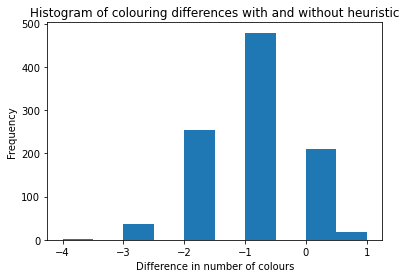

In [4]:
# your code goes here
num_graphs = 1000 
diff = []
for i in range (num_graphs):
    G = nx.erdos_renyi_graph(100, 0.2)
    heuristic = len(set(greedy_colouring(G, use_heuristic=True)))
    Noheuristic = len(set(greedy_colouring(G, use_heuristic=False)))
    diff.append(heuristic-Noheuristic)
    
plt.hist(diff, bins = 10)
plt.title('Histogram of colouring differences with and without heuristic')
plt.xlabel('Difference in number of colours')
plt.ylabel('Frequency')
plt.show()
# diff

YOUR ANSWER HERE
<br> Sorting with Heuristic generally reduce the minimum number of colour by 1